In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as sm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


Assignment 1:
    Catagorical variables: Product_Catagory & Quality
    Figure out reference category (class 3) (this is comparing smth to the others, so for example how much more expensive the food is compared to the other product categories)
    

In [2]:
df = pd.read_csv('1672182Pet shop.csv')
df.head()

,Unnamed: 0,products_sold,product_category,quality,satisfaction,discount,retail_price,perc_physical,market_size
0,1,162907,toys,premium,4.0,4,30.0,54.2,2744
1,2,195042,food,premium,3.9,4,22.0,64.4,3083
2,3,72749,toys,premium,3.2,9,29.0,41.5,1641
3,4,148853,other,off_brand,4.1,4,14.0,54.2,1832
4,5,192908,health,off_brand,4.2,3,5.0,31.2,2967


In [3]:
PS_dummies = pd.get_dummies(df[['product_category', 'quality']]) 
df = pd.concat([df, PS_dummies], axis = 1)
df.head()

,Unnamed: 0,products_sold,product_category,quality,satisfaction,discount,retail_price,perc_physical,market_size,product_category_food,product_category_health,product_category_other,product_category_toys,quality_off_brand,quality_premium
0,1,162907,toys,premium,4.0,4,30.0,54.2,2744,False,False,False,True,False,True
1,2,195042,food,premium,3.9,4,22.0,64.4,3083,True,False,False,False,False,True
2,3,72749,toys,premium,3.2,9,29.0,41.5,1641,False,False,False,True,False,True
3,4,148853,other,off_brand,4.1,4,14.0,54.2,1832,False,False,True,False,True,False
4,5,192908,health,off_brand,4.2,3,5.0,31.2,2967,False,True,False,False,True,False


In [4]:
df.isnull().sum() #run this before model1 to check what category can be the dependent variable
#At first i tried doing this exercise with retail_price as the dependent variable because i thought it would be an interesting statistic
#But because there are missings in that category the CooksD wouldnt work, so check the df.isnull before picking a dependent variable

Unnamed: 0                   0
products_sold                0
product_category             0
quality                    109
satisfaction                 0
discount                     0
retail_price               155
perc_physical               67
market_size                  0
product_category_food        0
product_category_health      0
product_category_other       0
product_category_toys        0
quality_off_brand            0
quality_premium              0
dtype: int64

In [5]:
df = df.dropna() #if i didnt do this all the entire code just wouldnt work !figure this out still dk why!

In [6]:
model1 = sm.ols('products_sold~product_category_food+product_category_health+product_category_other+product_category_toys+quality_off_brand+quality_premium+satisfaction+discount+retail_price+perc_physical+market_size',data=df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:          products_sold   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     774.7
Date:                Thu, 04 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:43:15   Log-Likelihood:                -22293.
No. Observations:                1941   AIC:                         4.461e+04
Df Residuals:                    1931   BIC:                         4.466e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [7]:
CooksD = model1.get_influence().cooks_distance
n = len(df)
print(CooksD[0])
df['Outlier'] = CooksD[0] > 4/n #CooksD checks for outliers, we have to find a way to check if these outliers are natural or not (non natural outliers are for exmpl typos) just dropping them all also drops the natural outliers wich removes the possibility of 
# any non linear correlation

[5.78022625e-05 2.21611767e-06 3.24637370e-08 ... 2.50250338e-07
 5.99701135e-05 4.89182802e-08]


In [8]:
df.loc[df['Outlier']==True, 'Outlier'] = np.NaN #turned outliers into NaN (missing values)
#this one is wrong atm needs to be fixed
df.head() #filter for outlier=True and then manually decide wich outliers are impossible (non natural outliers)

/tmp/ipykernel_16614/3583800063.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[df['Outlier']==True, 'Outlier'] = np.NaN #turned outliers into NaN (missing values)


,Unnamed: 0,products_sold,product_category,quality,satisfaction,discount,retail_price,perc_physical,market_size,product_category_food,product_category_health,product_category_other,product_category_toys,quality_off_brand,quality_premium,Outlier
0,1,162907,toys,premium,4.0,4,30.0,54.2,2744,False,False,False,True,False,True,False
1,2,195042,food,premium,3.9,4,22.0,64.4,3083,True,False,False,False,False,True,False
2,3,72749,toys,premium,3.2,9,29.0,41.5,1641,False,False,False,True,False,True,False
3,4,148853,other,off_brand,4.1,4,14.0,54.2,1832,False,False,True,False,True,False,False
4,5,192908,health,off_brand,4.2,3,5.0,31.2,2967,False,True,False,False,True,False,False


Assignment 2:

In [18]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
df_as2 = pd.read_csv('1672182Pet shop.csv')

In [19]:
df_new = pd.get_dummies(df_as2, dummy_na=True) #this makes a new set of dummies for categories that already had dummies
#dealed with categorical missing data by adding a quality_nan list to show where data missing

df_imputed = IterativeImputer().fit_transform(df_new)
df_imputed = pd.DataFrame(df_imputed, columns=df_new.columns)
#dealed with continuous missing values by imputing them

In [17]:
df_imputed.head()

,Unnamed: 0,products_sold,satisfaction,discount,retail_price,perc_physical,market_size,product_category_food,product_category_health,product_category_other,product_category_toys,product_category_nan,quality_off_brand,quality_premium,quality_nan
0,1.0,162907.0,4.0,4.0,30.0,54.2,2744.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2.0,195042.0,3.9,4.0,22.0,64.4,3083.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,72749.0,3.2,9.0,29.0,41.5,1641.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,4.0,148853.0,4.1,4.0,14.0,54.2,1832.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,5.0,192908.0,4.2,3.0,5.0,31.2,2967.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [11]:
import scipy.stats
#checking for multicollinearity
check1 = scipy.stats.pearsonr(df_imputed['satisfaction'], df_imputed['discount'])
print("satisfaction vs discount:", check1, "pvalue>0,8")
check2 = scipy.stats.pearsonr(df['satisfaction'], df['retail_price'])
print("satisfaction vs retail_price:", check2, "pvalue<0,8")
check3 = scipy.stats.pearsonr(df['satisfaction'], df['perc_physical'])
print("satisfaction vs perc_physical:", check3, "pvalue>0,8")
check4 = scipy.stats.pearsonr(df['satisfaction'], df['market_size'])
print("satisfaction vs market_size:", check4, "pvalue<0,8")
check5 = scipy.stats.pearsonr(df['discount'], df['retail_price'])
print("discount vs retail_price:", check5, "pvalue<0,8")
check6 = scipy.stats.pearsonr(df['discount'], df['perc_physical'])
print("discount vs perc_physical:", check6, "pvalue<0,8")
check7 = scipy.stats.pearsonr(df['discount'], df['market_size'])
print("discount vs market_size:", check7, "pvalue<0,8")
check8 = scipy.stats.pearsonr(df['retail_price'], df['perc_physical'])
print("retail_price vs perc_physical:", check8, "pvalue<0,8")
check9 = scipy.stats.pearsonr(df['retail_price'], df['market_size'])
print("retail_price vs market_size:", check9, "pvalue<0,8")
check10 = scipy.stats.pearsonr(df['perc_physical'], df['market_size'])
print("perc_physical vs market_size:", check10, "pvalue<0,8")

#statistic<0.8 on all of them means there is no multicollinearity       #turn everything into df_imputed

satisfaction vs discount: PearsonRResult(statistic=-0.0008241124165918244, pvalue=0.9710556223738548) pvalue>0,8
satisfaction vs retail_price: PearsonRResult(statistic=-0.015299567681099855, pvalue=0.5005307271061529) pvalue<0,8
satisfaction vs perc_physical: PearsonRResult(statistic=-0.003157347469726817, pvalue=0.88943963456944) pvalue>0,8
satisfaction vs market_size: PearsonRResult(statistic=-0.009462240162851404, pvalue=0.6769588456635695) pvalue<0,8
discount vs retail_price: PearsonRResult(statistic=-0.020487271542242023, pvalue=0.36699499724615936) pvalue<0,8
discount vs perc_physical: PearsonRResult(statistic=0.030373658827942934, pvalue=0.18102287779931966) pvalue<0,8
discount vs market_size: PearsonRResult(statistic=-0.009086554623334717, pvalue=0.6891014787464546) pvalue<0,8
retail_price vs perc_physical: PearsonRResult(statistic=0.033091245286938006, pvalue=0.1450187673067467) pvalue<0,8
retail_price vs market_size: PearsonRResult(statistic=0.014649064683024347, pvalue=0.518

In [12]:
#to fix this issue i have decided to run a new model without satisfaction.
model2 = sm.ols('products_sold~product_category_food+product_category_health+product_category_other+product_category_toys+quality_off_brand+quality_premium+discount+retail_price+perc_physical+market_size',data=df_imputed).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:          products_sold   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     301.2
Date:                Thu, 04 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:43:16   Log-Likelihood:                -22991.
No. Observations:                1941   AIC:                         4.600e+04
Df Residuals:                    1932   BIC:                         4.605e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

Assignment 3:

In [13]:
#sns.pairplot(df) #I dont see any NONlinear relationships, only (barely)linear ones or stats dat dont have any correlation at all


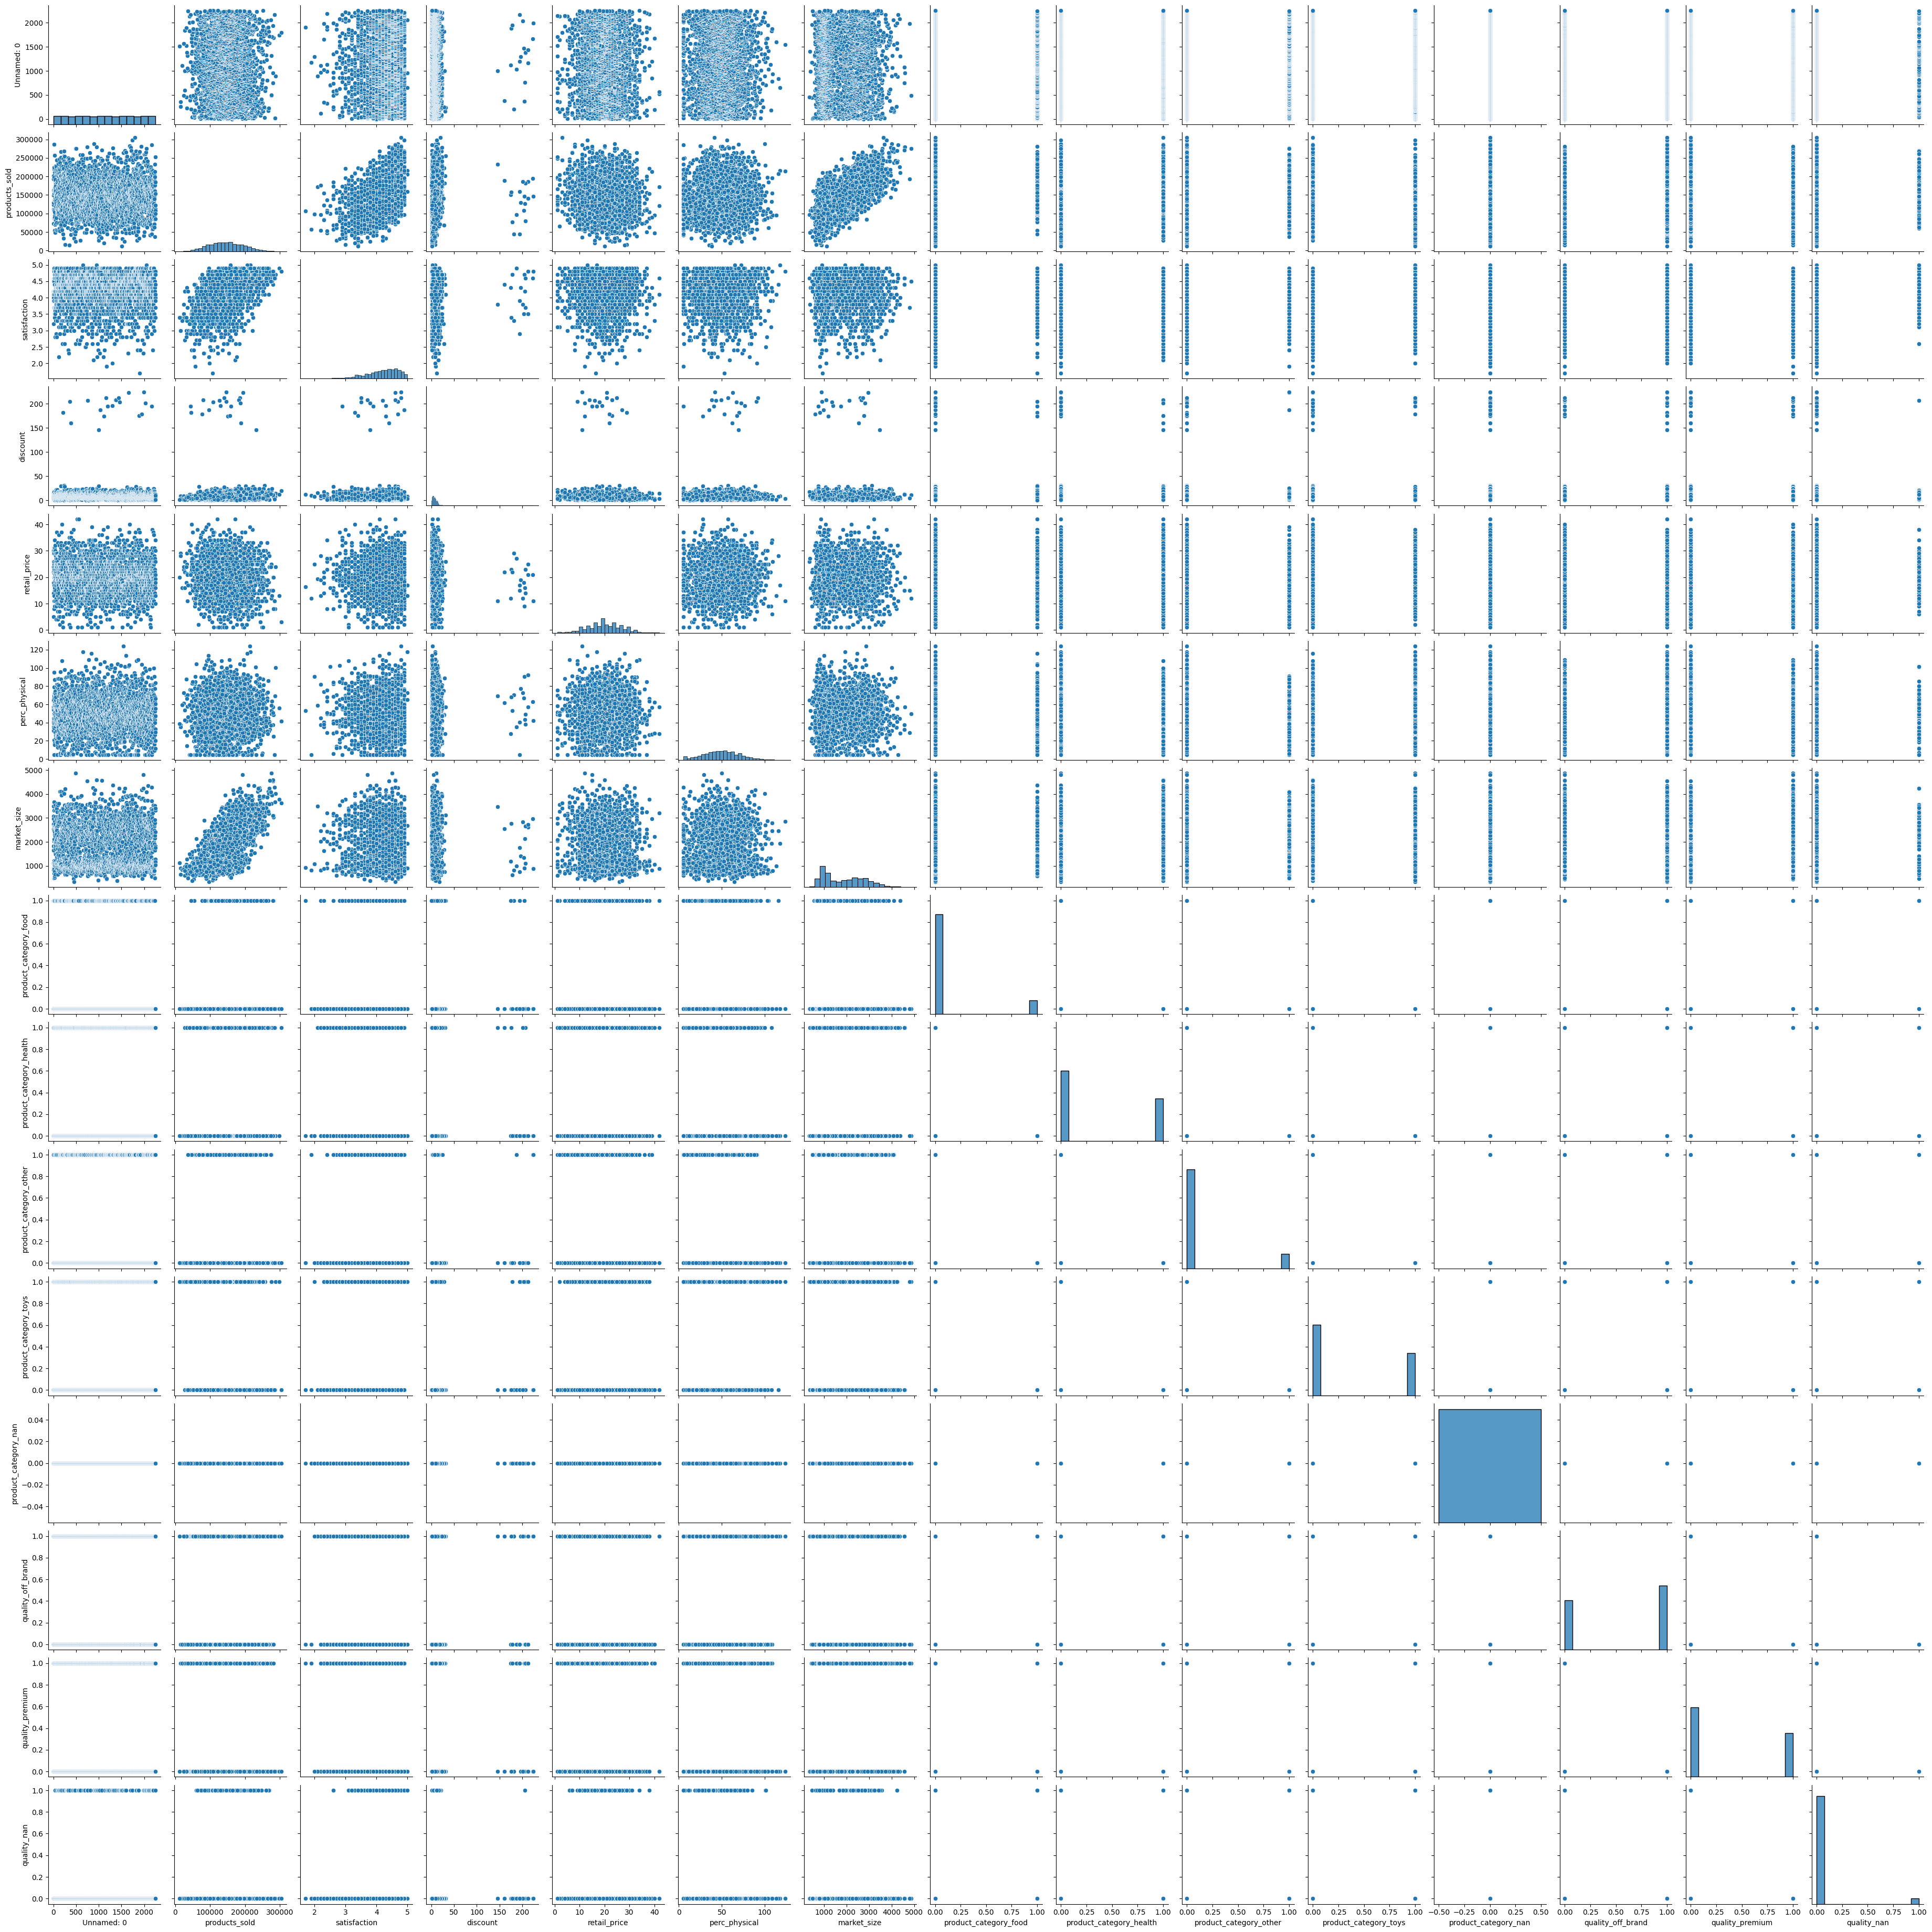

In [20]:
sns.pairplot(df_imputed) #why cant i use df_imputed
#dependent variable should always be products_sold, the independent one should be numerical variable so we only have to make 5 plots
#

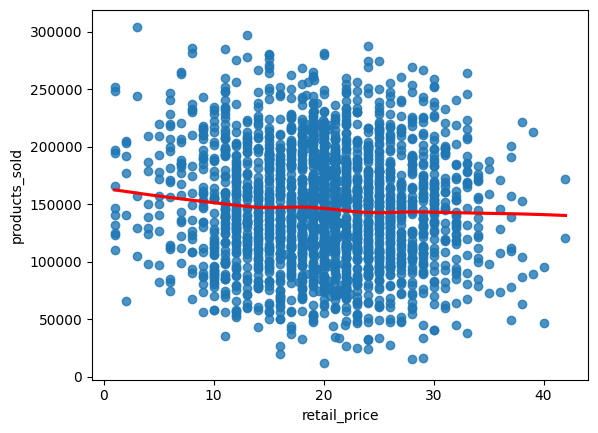

In [21]:
y = df_imputed['products_sold']
x = df_imputed['retail_price']
lowessplot = sns.regplot(x = x, y = y, lowess = True, line_kws={"color":"red"} )
plt.show(lowessplot) #i have tried many different variables vs eachother here but most of them dont show anything special

#slides week 4, a decreasing decrease non linear relationship

Assignment 4: